In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

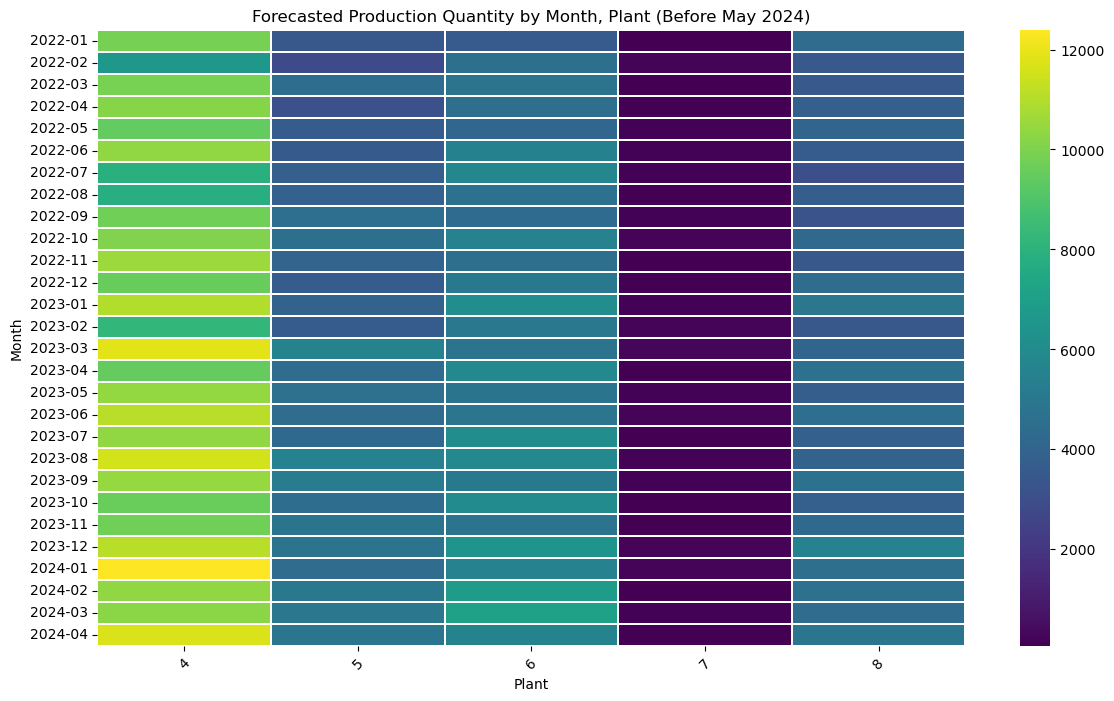

In [42]:
forecast_data = pd.read_csv('/Users/jd2235/Desktop/suncharge/data/Forecast.csv')
forecast_data['RequestedDeliveryMonth'] = pd.to_datetime(forecast_data['RequestedDeliveryMonth'])

# Choose data before May 2024
forecast_data = forecast_data[forecast_data['RequestedDeliveryMonth'] < '2024-05-01']
forecast_data['Month'] = forecast_data['RequestedDeliveryMonth'].dt.to_period('M')

aggregated_data = forecast_data.groupby(['Month', 'PlantKey', 'MaterialKey'])['Quantity'].sum().reset_index()
pivot_data = aggregated_data.pivot_table(index='Month', columns=['PlantKey',], values='Quantity', fill_value=0)
forecast_data = pivot_data

#save cleared forecast data to local
pivot_data.to_csv('/Users/jd2235/Desktop/suncharge/forecast_data.csv', index=True)

# Plot the data
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_data, cmap='viridis', linecolor='white', linewidths=0.1)
plt.title('Forecasted Production Quantity by Month, Plant (Before May 2024)')
plt.xlabel('Plant')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.savefig('/Users/jd2235/Desktop/suncharge/Forecasted Production Quantity by Month, Plant (Before May 2024)') 
plt.show()


In [44]:
# Separate data of two materials
forecast_dfs = {}
for key, group in aggregated_data.groupby('MaterialKey'):
    forecast_dfs[key] = group
    pivot_data = forecast_dfs[key].pivot_table(index='Month', columns=['PlantKey'], values='Quantity', fill_value=0)
    forecast_dfs[key] = pivot_data

print(forecast_dfs[1])
print(forecast_dfs[2])

PlantKey      4     5      6    7     8
Month                                  
2022-01   15978  5360   5170  180  6966
2022-02    9854  4008   7278  272  5614
2022-03   16554  7585   7715  140  5714
2022-04   17272  4644   7276  177  6007
2022-05   13967  5308   6284  236  6788
2022-06   17042  5642   9220  197  5665
2022-07   11054  5968   9508  124  4711
2022-08   11945  5956   7605  187  5478
2022-09   17064  7006   7225  243  4924
2022-10   16638  7514   8416  290  6201
2022-11   16961  6511   7629  129  5466
2022-12   15384  5957   8412   85  6975
2023-01   18831  5975   9708  154  8045
2023-02   12752  5620   7977  256  5309
2023-03   19483  8964   7619  374  6375
2023-04   15233  6667   9720  129  7447
2023-05   16759  7208   7879  263  6100
2023-06   18299  7050   8001  300  6674
2023-07   16895  6433   9149  140  5933
2023-08   19235  8503   9177  193  6167
2023-09   16193  7990   8277  182  7100
2023-10   15857  6901   9718  157  5856
2023-11   16050  8052   7227  150  6478


       Month  PlantKey  MaterialKey  OrderQuantity
0    2022-01         4            1           3560
1    2022-01         4            2            939
2    2022-01         5            1           2013
3    2022-01         5            2            404
4    2022-01         6            1           1754
..       ...       ...          ...            ...
274  2024-04         6            2           2289
275  2024-04         7            1            152
276  2024-04         7            2             36
277  2024-04         8            1           7758
278  2024-04         8            2           1758

[279 rows x 4 columns]


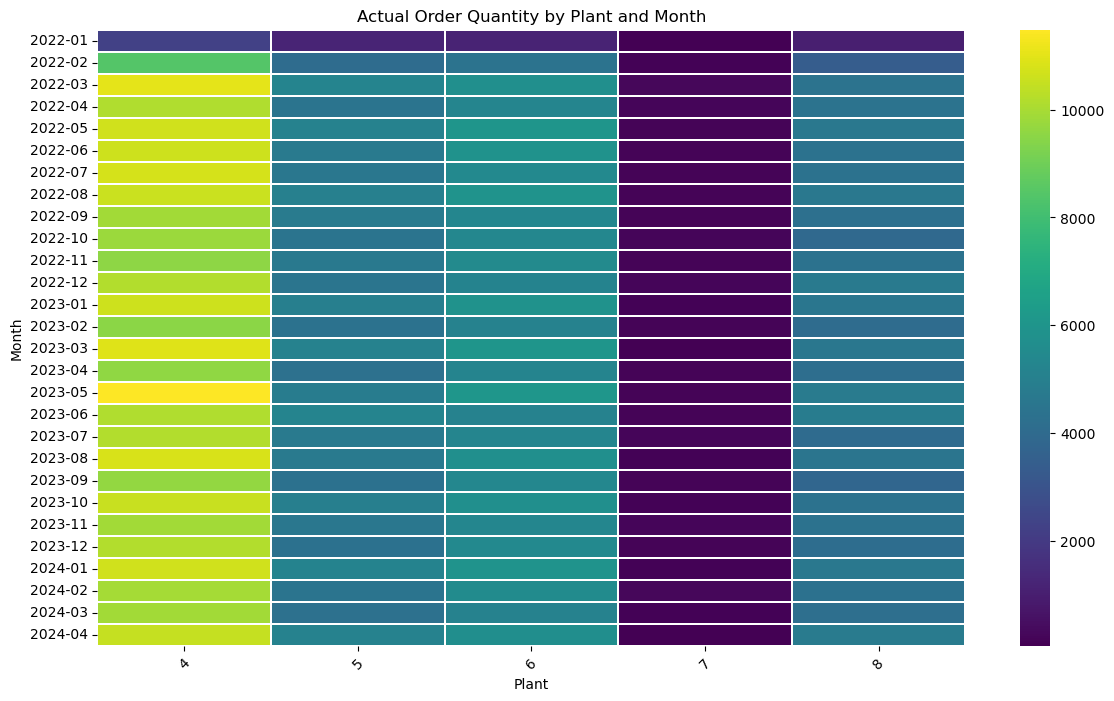

In [45]:
##ACTUAL SALES
sale_data = pd.read_csv('/Users/jd2235/Desktop/suncharge/data/Sales.csv')
sale_data['RequestedDeliveryDate'] = pd.to_datetime(sale_data['RequestedDeliveryDate'])


sale_data = sale_data[sale_data['RequestedDeliveryDate'] < '2024-05-01']
sale_data['Month'] = sale_data['RequestedDeliveryDate'].dt.to_period('M')

aggregated_data = sale_data.groupby(['Month', 'PlantKey', 'MaterialKey'])['OrderQuantity'].sum().reset_index()

pivot_data = aggregated_data.pivot_table(index='Month', columns=['PlantKey'], values='OrderQuantity', fill_value=0)
sales_data = pivot_data

pivot_data.to_csv('/Users/jd2235/Desktop/suncharge/sales_data.csv', index=True)

# Plot the data
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_data, cmap='viridis', linecolor='white', linewidths=0.1)
plt.title('Actual Order Quantity by Plant and Month')
plt.xlabel('Plant')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.savefig('/Users/jd2235/Desktop/suncharge/Actual Order Quantity by Plant and Month (Before May 2024)') 
plt.show()

In [46]:
# Separate dataframe for two materials
sales_dfs = {}
for key, group in aggregated_data.groupby('MaterialKey'):
    sales_dfs[key] = group
    pivot_data = sales_dfs[key].pivot_table(index='Month', columns=['PlantKey'], values='OrderQuantity', fill_value=0)
    sales_dfs[key] = pivot_data

PlantKey      4     5     6    7     8
Month                                 
2022-01   12418  3347  3416   96  5241
2022-02   -3184 -2597   366  122   227
2022-03   -1154  -574 -1494 -196 -1180
2022-04    1384 -2740 -1041 -159 -1020
2022-05   -3121 -2717 -3031  -25  -716
2022-06     225 -1841  -206  -54 -1184
2022-07   -6483 -1462   925 -171 -2328
2022-08   -5162 -2330 -1678  -10 -1929
2022-09    1305  -726 -1202   17 -1939
2022-10    1061   385    67  -39    26
2022-11    1729  -890 -1092 -164 -1369
2022-12    -896 -1468   145 -300  -611
2023-01    2060 -1934   273  -54   517
2023-02   -2418 -1414  -425  -66 -1328
2023-03    1885   920 -2122  270 -1298
2023-04     151  -346  1278 -145   766
2023-05   -1554  -598 -1884   43 -1647
2023-06    2744 -1381  -207   46  -784
2023-07     540  -865   674 -197  -479
2023-08    2153  1228    49  -16  -667
2023-09     644   945  -168  -77  1048
2023-10    -961 -1296   396  -73  -956
2023-11     389   562 -1314 -208  -630
2023-12    1796   149  17

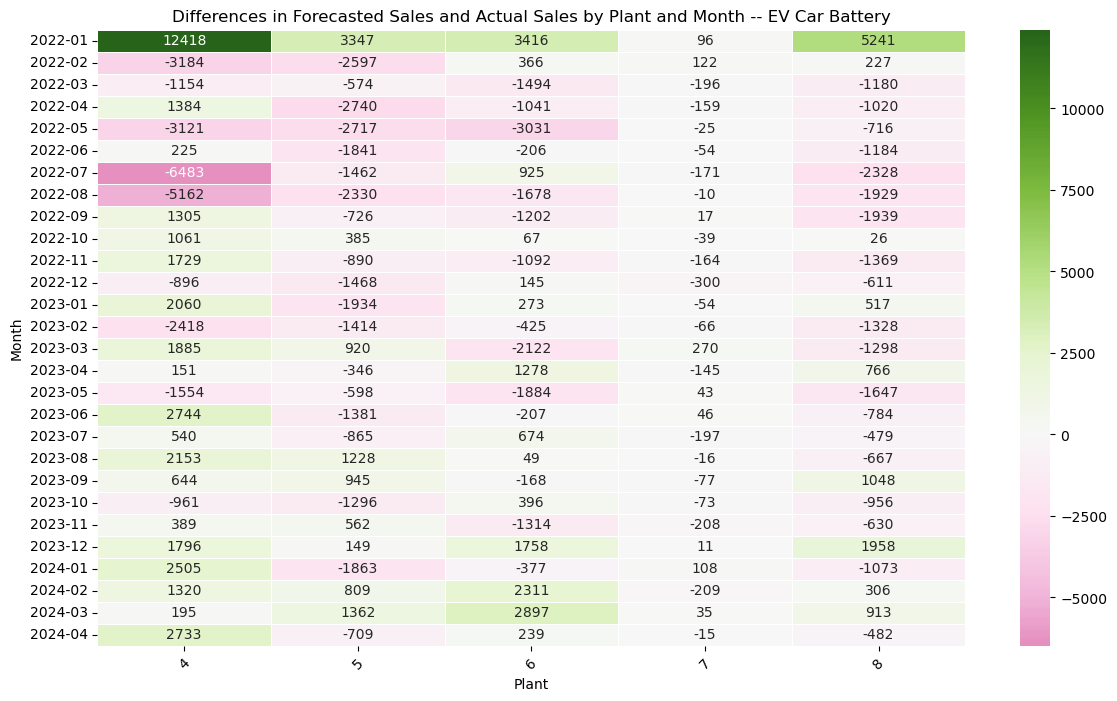

In [51]:
##Plot heatmap of prediciton error of EV Car Battery
prediciton_error = forecast_dfs[1] - sales_dfs[1]
#print(prediciton_error)

# Plot the data
plt.figure(figsize=(14, 8))
sns.heatmap(prediciton_error, vmin=-6483, vmax=12418,center=0, cmap="PiYG", annot=True, fmt=".0f", linewidths=0.5, linecolor='white')
plt.title('Differences in Forecasted Sales and Actual Sales by Plant and Month -- EV Car Battery')
plt.xlabel('Plant')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.savefig('/Users/jd2235/Desktop/suncharge/Differences in Forecasted Sales and Actual Sales by Plant and Month  -- EV Car Battery') 
plt.show()

PlantKey     4     5     6    7     8
Month                                
2022-01   2771  1061  1468   -7  1478
2022-02   -332    89    12   23     6
2022-03  -1153  -948  -404 -119  -700
2022-04  -1307   -87  -470    1  -241
2022-05    753  -230  -836  -36  -484
2022-06   -756  -559  -635   11  -367
2022-07    765  -206  -269  113  -353
2022-08   -392    32  -858  -59     6
2022-09  -1705   179  -755  -77   -76
2022-10   -493   -93   314   11   559
2022-11    211  -481  -889  -25  -497
2022-12   -419  -335  -357    6   -19
2023-01  -1276   -62   211   89   302
2023-02   -200  -120   199   62     8
2023-03    -12     2  -378   13   288
2023-04   -348   602    99  -39   393
2023-05   -590   192  -642  -25  -450
2023-06   -872  -260  -326    4   114
2023-07   -145   -91   933  -23   133
2023-08   -659   439   252   69  -546
2023-09    970   712  -329   33   691
2023-10   -936   280   134  -23  -258
2023-11   -679   -95   256   -7   330
2023-12    -34   785   215   51   788
2024-01   10

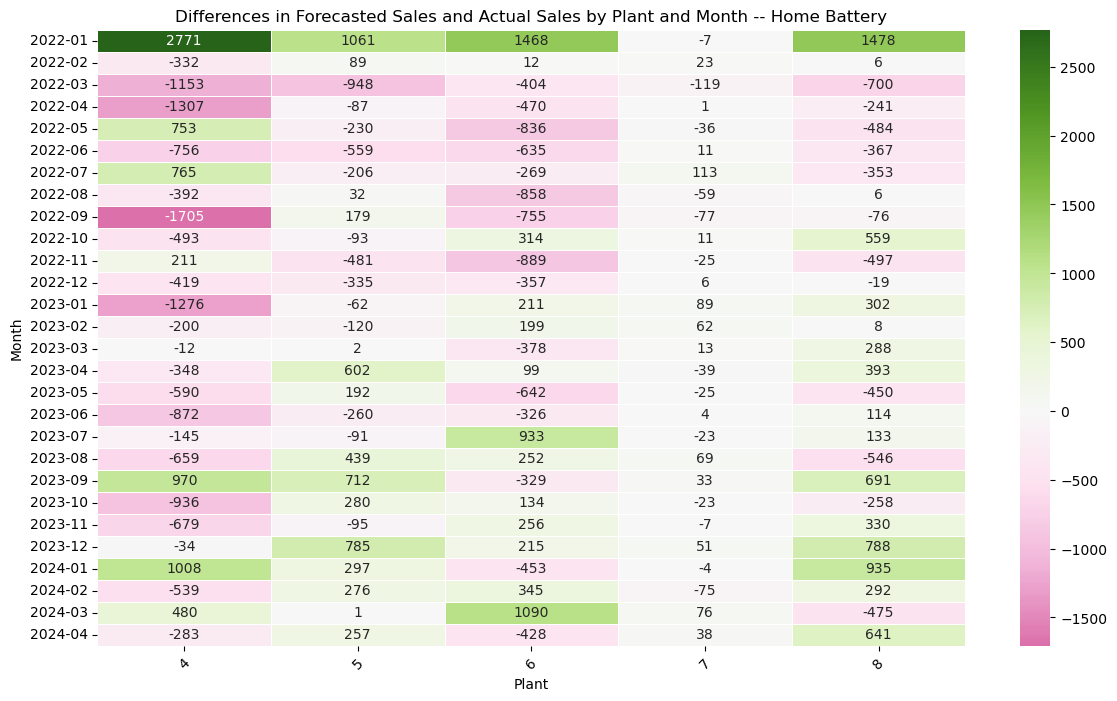

In [52]:
##Plot heatmap of prediciton error of Home Battery
prediciton_error = forecast_dfs[2] - sales_dfs[2]
print(prediciton_error)

# Plot the data
plt.figure(figsize=(14, 8))
sns.heatmap(prediciton_error, vmin=-1705, vmax=2771,center=0, cmap="PiYG", annot=True, fmt=".0f", linewidths=0.5, linecolor='white')
plt.title('Differences in Forecasted Sales and Actual Sales by Plant and Month -- Home Battery')
plt.xlabel('Plant')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.savefig('/Users/jd2235/Desktop/suncharge/Differences in Forecasted Sales and Actual Sales by Plant and Month -- Home Battery') 
plt.show()